In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('D:\iron_ore_dataset.xlsx',sheet_name = 'iron_ore_dataset')

In [2]:
df.head()

,Date,Iron_Ore_Price,Global_Demand,Global_Supply,Freight_Rate,Stockpile,Production_Volume,Production_Cost,Ore_Grade,Mining_Location,Exchange_Rate_USD,Interest_Rate,Inflation_Rate,GDP_Growth_Importer,Tariffs,Steel_Production,Carbon_Emissions,Aluminum_Price,Copper_Price,Nickel_Price
0,2022-01-01,11938.020742,2310.631678,1673.831590,2496.686994,17.446315,110219.266863,5883.992186,Goethite,NaN,5.783085,1.805682,5.376856,NaN,13.641912,1645.046132,1.216302,49355.542236,113204.688508,212075.979790
1,2022-01-02,16212.064072,1879.548834,2059.746073,1036.309350,53.608420,100712.661405,6237.738165,Siderite,South Africa,NaN,4.904004,3.077467,5.581772,7.799972,1806.722736,1.503198,48261.516439,130202.450118,276565.377066
2,2022-01-03,5550.248043,1749.145018,2175.472212,1027.115407,37.217756,69023.603383,2909.088264,Goethite,Australia,7.257037,4.202138,3.013881,3.121292,11.819114,1676.901415,1.543930,40312.266934,81109.332289,187750.193708
3,2022-01-04,8786.554165,2033.115296,1866.294005,2071.088032,60.706753,108761.367584,4151.732662,Limonite,Australia,5.052935,5.645213,1.181036,2.492174,3.417648,1666.807445,2.441336,40627.740542,95074.358681,196797.927356
4,2022-01-05,15700.243788,2321.127011,2142.928296,3778.582205,82.342440,74399.122266,2827.498873,Hematite,Australia,6.551019,3.743544,3.755707,6.584033,7.353330,1518.969156,1.097101,48512.610566,147853.914375,312543.811282


In [3]:
df.shape

(735, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 735 non-null    datetime64[ns]
 1   Iron_Ore_Price       699 non-null    float64       
 2   Global_Demand        699 non-null    float64       
 3   Global_Supply        699 non-null    float64       
 4   Freight_Rate         699 non-null    float64       
 5   Stockpile            698 non-null    float64       
 6   Production_Volume    698 non-null    float64       
 7   Production_Cost      698 non-null    float64       
 8   Ore_Grade            698 non-null    object        
 9   Mining_Location      699 non-null    object        
 10  Exchange_Rate_USD    698 non-null    float64       
 11  Interest_Rate        699 non-null    float64       
 12  Inflation_Rate       699 non-null    float64       
 13  GDP_Growth_Importer  697 non-null  

In [5]:
df['Ore_Grade'].nunique()

5

In [6]:
df['Mining_Location'].unique()

array([nan, 'South Africa', 'Australia', 'Brazil', 'India'], dtype=object)

In [7]:
df['Iron_Ore_Price'].median()

12532.9251549686

## KNN Imputation

In [8]:
df1 = df.iloc[:,1:]

In [9]:
from sklearn.preprocessing import LabelEncoder

label_df = LabelEncoder()
df1['Ore_Grade'] = label_df.fit_transform(df1['Ore_Grade'])
df1['Mining_Location'] = label_df.fit_transform(df1['Mining_Location'])

In [10]:
df1

,Iron_Ore_Price,Global_Demand,Global_Supply,Freight_Rate,Stockpile,Production_Volume,Production_Cost,Ore_Grade,Mining_Location,Exchange_Rate_USD,Interest_Rate,Inflation_Rate,GDP_Growth_Importer,Tariffs,Steel_Production,Carbon_Emissions,Aluminum_Price,Copper_Price,Nickel_Price
0,11938.020742,2310.631678,1673.831590,2496.686994,17.446315,110219.266863,5883.992186,0,4,5.783085,1.805682,5.376856,NaN,13.641912,1645.046132,1.216302,49355.542236,113204.688508,212075.979790
1,16212.064072,1879.548834,2059.746073,1036.309350,53.608420,100712.661405,6237.738165,4,3,NaN,4.904004,3.077467,5.581772,7.799972,1806.722736,1.503198,48261.516439,130202.450118,276565.377066
2,5550.248043,1749.145018,2175.472212,1027.115407,37.217756,69023.603383,2909.088264,0,0,7.257037,4.202138,3.013881,3.121292,11.819114,1676.901415,1.543930,40312.266934,81109.332289,187750.193708
3,8786.554165,2033.115296,1866.294005,2071.088032,60.706753,108761.367584,4151.732662,2,0,5.052935,5.645213,1.181036,2.492174,3.417648,1666.807445,2.441336,40627.740542,95074.358681,196797.927356
4,15700.243788,2321.127011,2142.928296,3778.582205,82.342440,74399.122266,2827.498873,1,0,6.551019,3.743544,3.755707,6.584033,7.353330,1518.969156,1.097101,48512.610566,147853.914375,312543.811282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,18493.618599,2100.834047,2242.653587,1501.963912,NaN,NaN,5051.815039,1,2,NaN,4.847551,2.638275,4.562913,9.436704,1524.135943,1.349399,43950.218168,156230.252408,325833.807177
731,10204.298028,1869.925623,1831.942905,2213.582157,47.007774,103671.687400,NaN,2,1,5.029338,3.662404,1.818120,NaN,NaN,1786.975211,2.642144,49477.746962,93907.466945,220376.428035
732,8630.675238,1904.765858,2293.929531,2365.515975,12.312068,119755.450133,5380.978732,4,1,6.728478,8.740662,2.707630,3.270889,13.971333,1626.404456,NaN,38651.625397,104608.876966,229302.613676
733,10839.434211,1631.736593,1920.966106,2282.804001,29.840140,66352.042346,2807.238430,5,2,7.707626,1.417903,3.612864,5.504090,9.298469,1629.519605,2.466048,42093.607866,115301.361183,204928.408366


In [11]:
from sklearn.impute import KNNImputer,SimpleImputer

knn = KNNImputer(n_neighbors=5,weights='distance')

In [12]:
imp_df = knn.fit_transform(df1)
columns = ['Iron_Ore_Price', 'Global_Demand', 'Global_Supply','Freight_Rate' , 'Stockpile', 'Production_Volume', 'Production_Cost', 'Ore_Grade',
           'Mining_Location', 'Exchange_Rate_USD', 'Interest_Rate', 'Inflation_Rate', 'GDP_Growth_Importer', 'Tariffs', 'Steel_Production'
          ,'Carbon_Emissions', 'Aluminum_Price', 'Copper_Price', 'Nickel_Price']
imp_df = pd.DataFrame(imp_df, columns = columns)

In [13]:
df1

,Iron_Ore_Price,Global_Demand,Global_Supply,Freight_Rate,Stockpile,Production_Volume,Production_Cost,Ore_Grade,Mining_Location,Exchange_Rate_USD,Interest_Rate,Inflation_Rate,GDP_Growth_Importer,Tariffs,Steel_Production,Carbon_Emissions,Aluminum_Price,Copper_Price,Nickel_Price
0,11938.020742,2310.631678,1673.831590,2496.686994,17.446315,110219.266863,5883.992186,0,4,5.783085,1.805682,5.376856,NaN,13.641912,1645.046132,1.216302,49355.542236,113204.688508,212075.979790
1,16212.064072,1879.548834,2059.746073,1036.309350,53.608420,100712.661405,6237.738165,4,3,NaN,4.904004,3.077467,5.581772,7.799972,1806.722736,1.503198,48261.516439,130202.450118,276565.377066
2,5550.248043,1749.145018,2175.472212,1027.115407,37.217756,69023.603383,2909.088264,0,0,7.257037,4.202138,3.013881,3.121292,11.819114,1676.901415,1.543930,40312.266934,81109.332289,187750.193708
3,8786.554165,2033.115296,1866.294005,2071.088032,60.706753,108761.367584,4151.732662,2,0,5.052935,5.645213,1.181036,2.492174,3.417648,1666.807445,2.441336,40627.740542,95074.358681,196797.927356
4,15700.243788,2321.127011,2142.928296,3778.582205,82.342440,74399.122266,2827.498873,1,0,6.551019,3.743544,3.755707,6.584033,7.353330,1518.969156,1.097101,48512.610566,147853.914375,312543.811282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,18493.618599,2100.834047,2242.653587,1501.963912,NaN,NaN,5051.815039,1,2,NaN,4.847551,2.638275,4.562913,9.436704,1524.135943,1.349399,43950.218168,156230.252408,325833.807177
731,10204.298028,1869.925623,1831.942905,2213.582157,47.007774,103671.687400,NaN,2,1,5.029338,3.662404,1.818120,NaN,NaN,1786.975211,2.642144,49477.746962,93907.466945,220376.428035
732,8630.675238,1904.765858,2293.929531,2365.515975,12.312068,119755.450133,5380.978732,4,1,6.728478,8.740662,2.707630,3.270889,13.971333,1626.404456,NaN,38651.625397,104608.876966,229302.613676
733,10839.434211,1631.736593,1920.966106,2282.804001,29.840140,66352.042346,2807.238430,5,2,7.707626,1.417903,3.612864,5.504090,9.298469,1629.519605,2.466048,42093.607866,115301.361183,204928.408366


In [14]:
imp_df

,Iron_Ore_Price,Global_Demand,Global_Supply,Freight_Rate,Stockpile,Production_Volume,Production_Cost,Ore_Grade,Mining_Location,Exchange_Rate_USD,Interest_Rate,Inflation_Rate,GDP_Growth_Importer,Tariffs,Steel_Production,Carbon_Emissions,Aluminum_Price,Copper_Price,Nickel_Price
0,11938.020742,2310.631678,1673.831590,2496.686994,17.446315,110219.266863,5883.992186,0.0,4.0,5.783085,1.805682,5.376856,4.188146,13.641912,1645.046132,1.216302,49355.542236,113204.688508,212075.979790
1,16212.064072,1879.548834,2059.746073,1036.309350,53.608420,100712.661405,6237.738165,4.0,3.0,6.994695,4.904004,3.077467,5.581772,7.799972,1806.722736,1.503198,48261.516439,130202.450118,276565.377066
2,5550.248043,1749.145018,2175.472212,1027.115407,37.217756,69023.603383,2909.088264,0.0,0.0,7.257037,4.202138,3.013881,3.121292,11.819114,1676.901415,1.543930,40312.266934,81109.332289,187750.193708
3,8786.554165,2033.115296,1866.294005,2071.088032,60.706753,108761.367584,4151.732662,2.0,0.0,5.052935,5.645213,1.181036,2.492174,3.417648,1666.807445,2.441336,40627.740542,95074.358681,196797.927356
4,15700.243788,2321.127011,2142.928296,3778.582205,82.342440,74399.122266,2827.498873,1.0,0.0,6.551019,3.743544,3.755707,6.584033,7.353330,1518.969156,1.097101,48512.610566,147853.914375,312543.811282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,18493.618599,2100.834047,2242.653587,1501.963912,34.025089,156966.884567,5051.815039,1.0,2.0,6.078462,4.847551,2.638275,4.562913,9.436704,1524.135943,1.349399,43950.218168,156230.252408,325833.807177
731,10204.298028,1869.925623,1831.942905,2213.582157,47.007774,103671.687400,2897.762283,2.0,1.0,5.029338,3.662404,1.818120,5.160842,6.737673,1786.975211,2.642144,49477.746962,93907.466945,220376.428035
732,8630.675238,1904.765858,2293.929531,2365.515975,12.312068,119755.450133,5380.978732,4.0,1.0,6.728478,8.740662,2.707630,3.270889,13.971333,1626.404456,2.364349,38651.625397,104608.876966,229302.613676
733,10839.434211,1631.736593,1920.966106,2282.804001,29.840140,66352.042346,2807.238430,5.0,2.0,7.707626,1.417903,3.612864,5.504090,9.298469,1629.519605,2.466048,42093.607866,115301.361183,204928.408366


In [15]:
imp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Iron_Ore_Price       735 non-null    float64
 1   Global_Demand        735 non-null    float64
 2   Global_Supply        735 non-null    float64
 3   Freight_Rate         735 non-null    float64
 4   Stockpile            735 non-null    float64
 5   Production_Volume    735 non-null    float64
 6   Production_Cost      735 non-null    float64
 7   Ore_Grade            735 non-null    float64
 8   Mining_Location      735 non-null    float64
 9   Exchange_Rate_USD    735 non-null    float64
 10  Interest_Rate        735 non-null    float64
 11  Inflation_Rate       735 non-null    float64
 12  GDP_Growth_Importer  735 non-null    float64
 13  Tariffs              735 non-null    float64
 14  Steel_Production     735 non-null    float64
 15  Carbon_Emissions     735 non-null    flo

In [16]:
imp_df['Iron_Ore_Price'].median()

12588.3301832669

In [17]:
df['Iron_Ore_Price'].median()

12532.9251549686

In [18]:
imp_df['Iron_Ore_Price'].mean()

13307.391107121475

In [19]:
df['Iron_Ore_Price'].mean()

13301.199774638622

In [20]:
imp_df.shape

(735, 19)

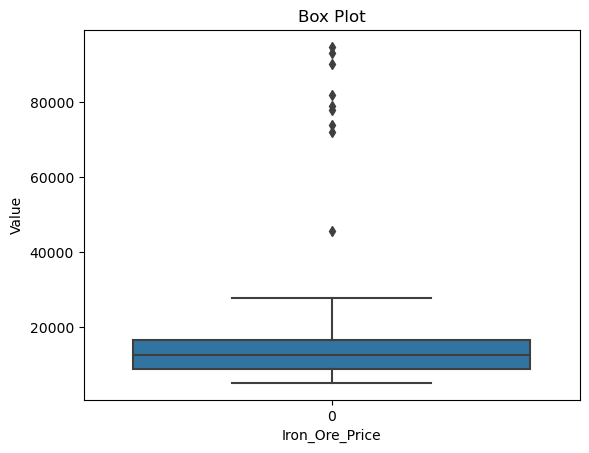

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with a column 'column_name'
sns.boxplot(data=imp_df['Iron_Ore_Price'])
plt.xlabel('Iron_Ore_Price')
plt.ylabel('Value')
plt.title('Box Plot')
plt.show()

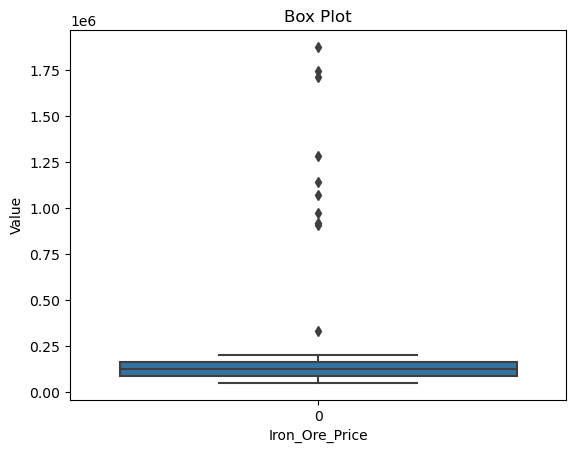

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with a column 'column_name'
sns.boxplot(data=imp_df['Production_Volume'])
plt.xlabel('Iron_Ore_Price')
plt.ylabel('Value')
plt.title('Box Plot')
plt.show()

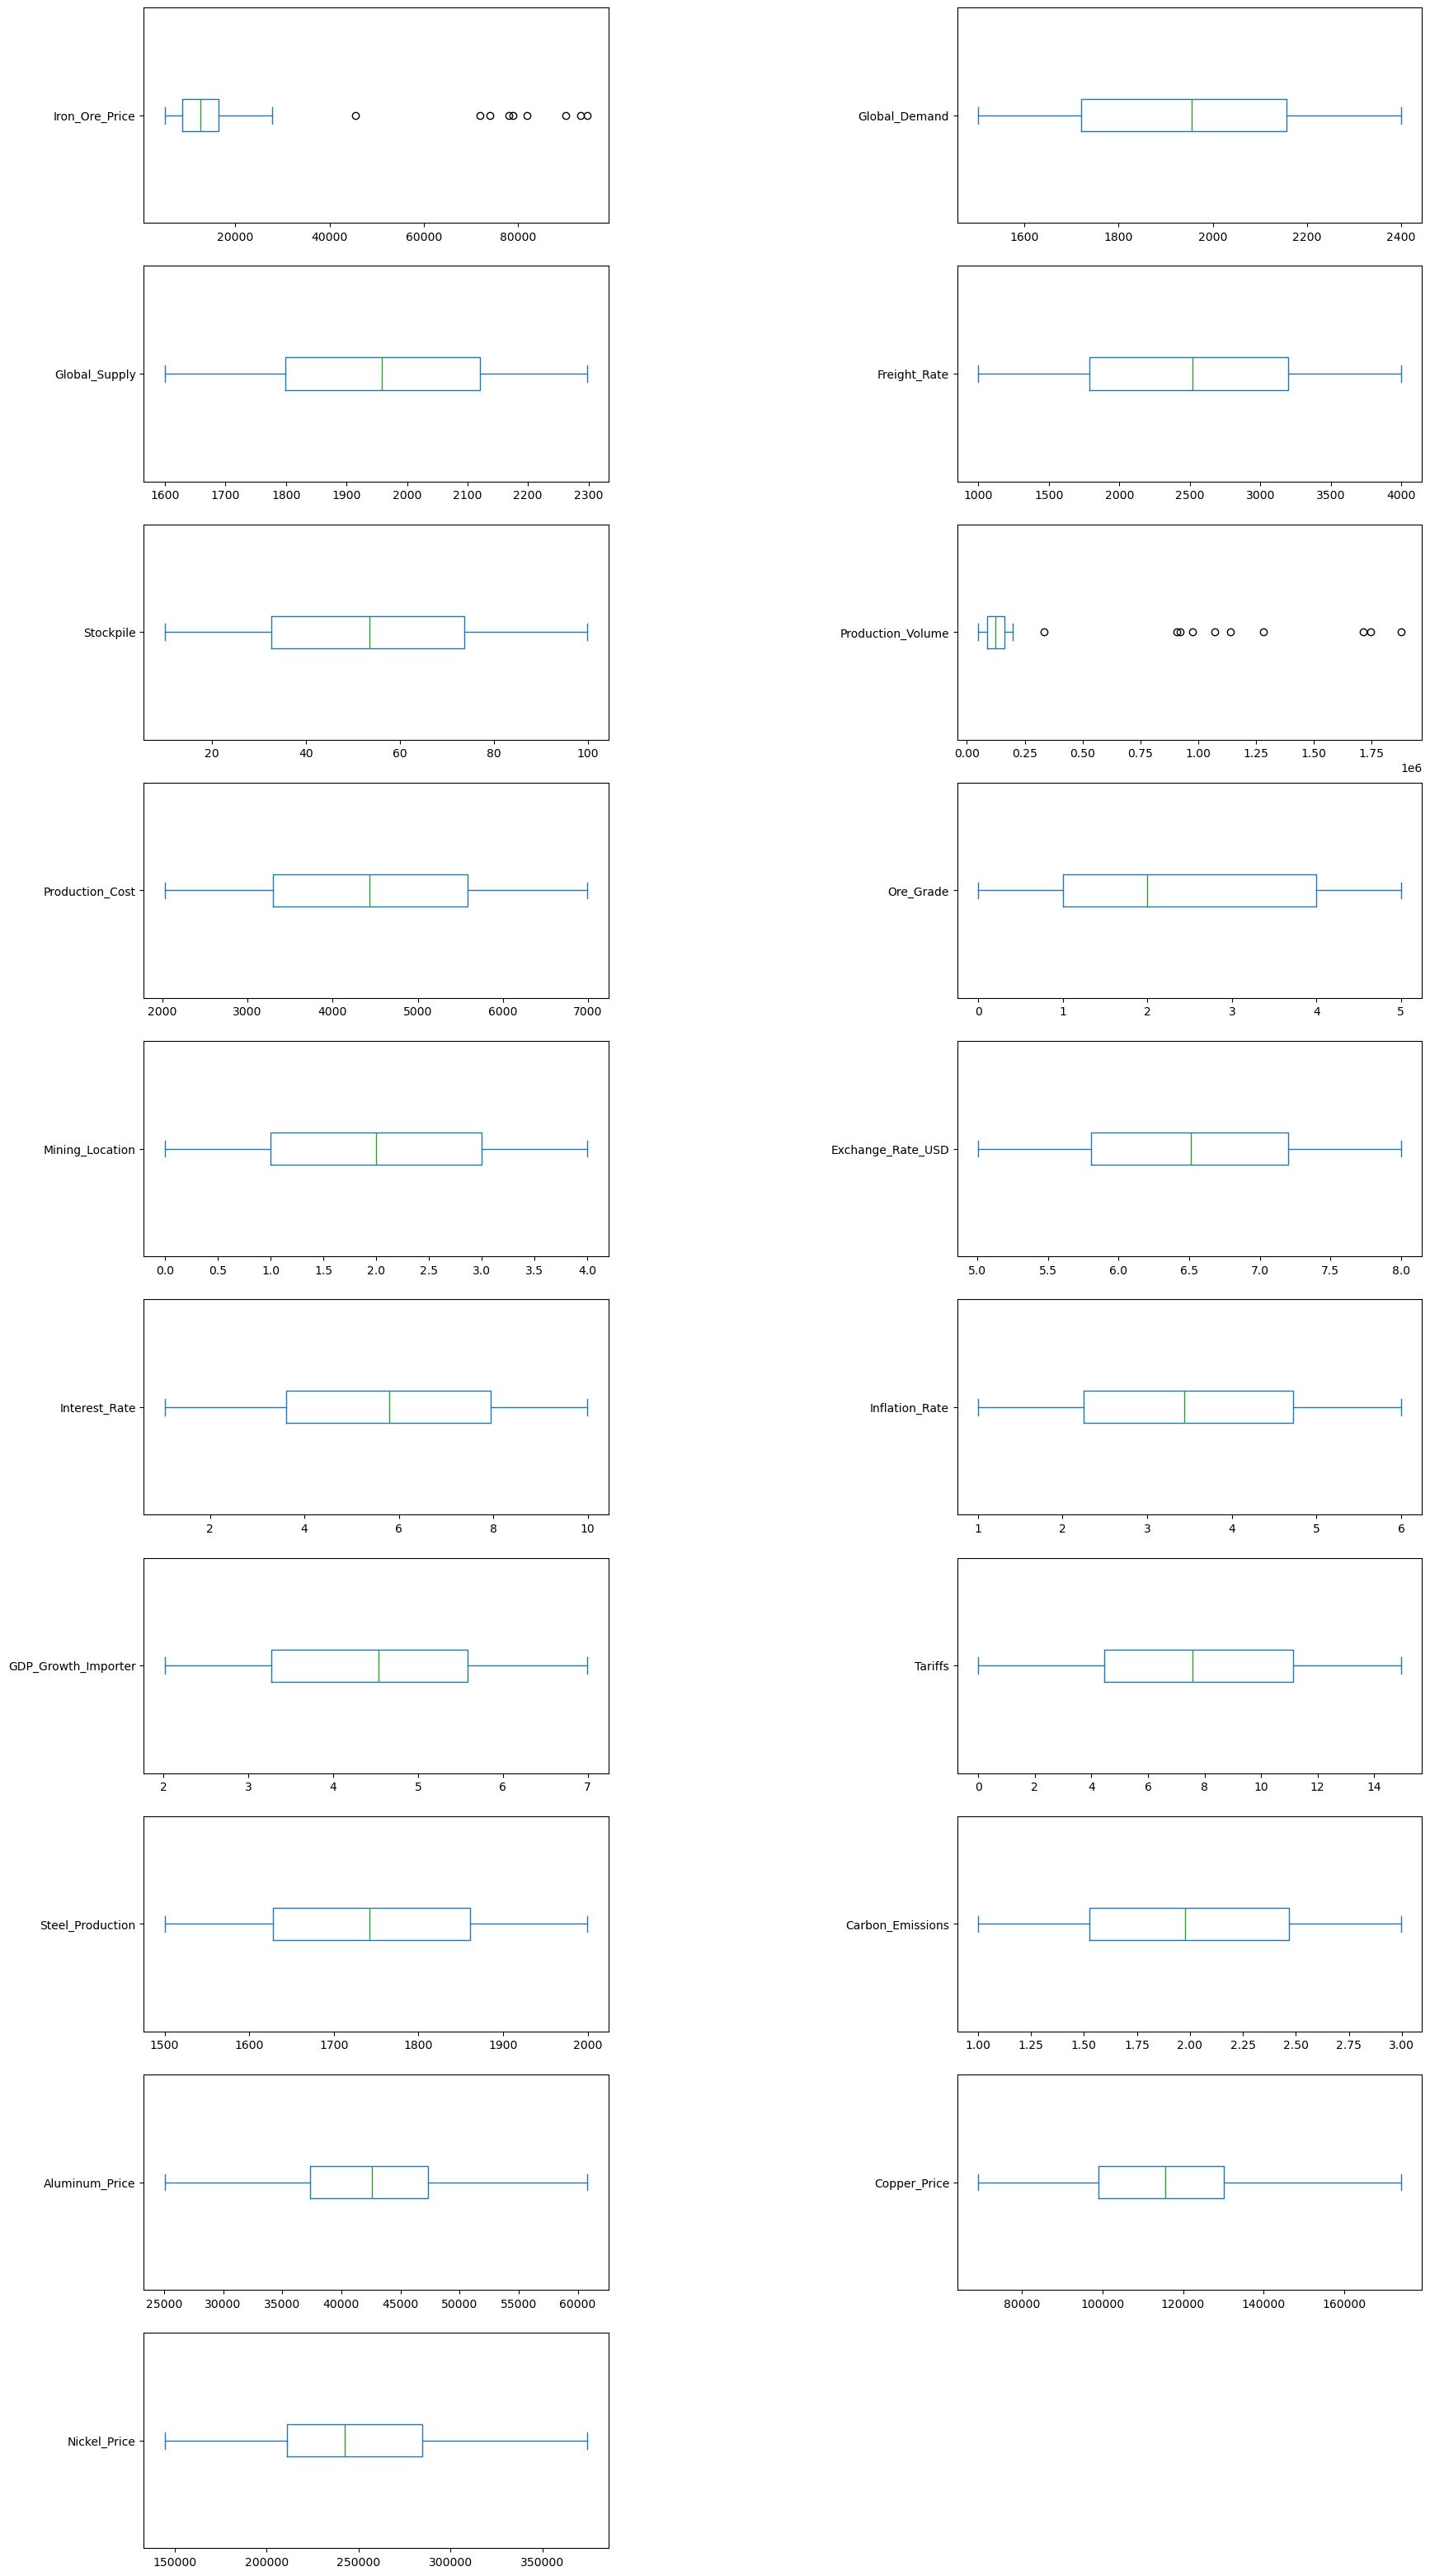

In [23]:
imp_df.plot(kind="box", sharey=False, sharex=False, subplots=True, figsize=(20, 40), layout=[10, 2], vert=0)
plt.subplots_adjust(wspace=0.75)

## Winsorization

In [24]:
from feature_engine.outliers import Winsorizer

win_df = Winsorizer(capping_method = 'iqr',
                      fold = 1.5,
                      tail = 'both',
                      variables = ['Iron_Ore_Price'])

In [25]:
imp_df1 = win_df.fit_transform(imp_df)

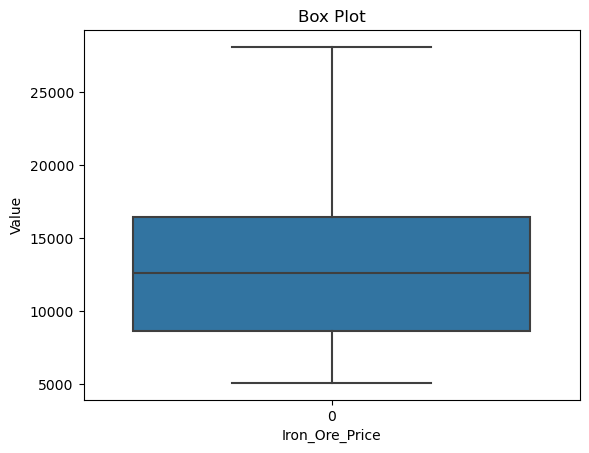

In [26]:
sns.boxplot(data=imp_df1['Iron_Ore_Price'])
plt.xlabel('Iron_Ore_Price')
plt.ylabel('Value')
plt.title('Box Plot')
plt.show()

In [27]:
from feature_engine.outliers import Winsorizer

win_df = Winsorizer(capping_method = 'iqr',
                      fold = 1.5,
                      tail = 'both',
                      variables = ['Production_Volume'])

In [28]:
imp_df1 = win_df.fit_transform(imp_df)

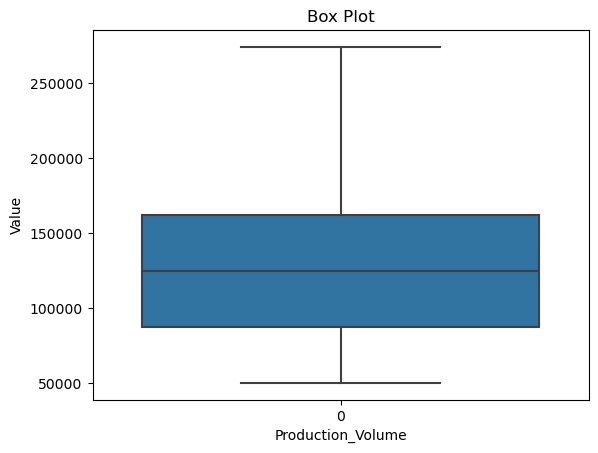

In [29]:
sns.boxplot(data=imp_df1['Production_Volume'])
plt.xlabel('Production_Volume')
plt.ylabel('Value')
plt.title('Box Plot')
plt.show()

## Insights

MEAN

In [30]:
imp_df.mean()

Iron_Ore_Price          13307.391107
Global_Demand            1944.284051
Global_Supply            1955.733267
Freight_Rate             2500.464071
Stockpile                  53.721560
Production_Volume      138716.339544
Production_Cost          4471.081457
Ore_Grade                   2.262585
Mining_Location             1.624490
Exchange_Rate_USD           6.483978
Interest_Rate               5.700138
Inflation_Rate              3.461189
GDP_Growth_Importer         4.473035
Tariffs                     7.692735
Steel_Production         1744.583121
Carbon_Emissions            1.983236
Aluminum_Price          42511.253393
Copper_Price           115184.772517
Nickel_Price           248309.146126
dtype: float64

In [31]:
imp_df1.mean()

Iron_Ore_Price          13307.391107
Global_Demand            1944.284051
Global_Supply            1955.733267
Freight_Rate             2500.464071
Stockpile                  53.721560
Production_Volume      126170.627540
Production_Cost          4471.081457
Ore_Grade                   2.262585
Mining_Location             1.624490
Exchange_Rate_USD           6.483978
Interest_Rate               5.700138
Inflation_Rate              3.461189
GDP_Growth_Importer         4.473035
Tariffs                     7.692735
Steel_Production         1744.583121
Carbon_Emissions            1.983236
Aluminum_Price          42511.253393
Copper_Price           115184.772517
Nickel_Price           248309.146126
dtype: float64

Skewness

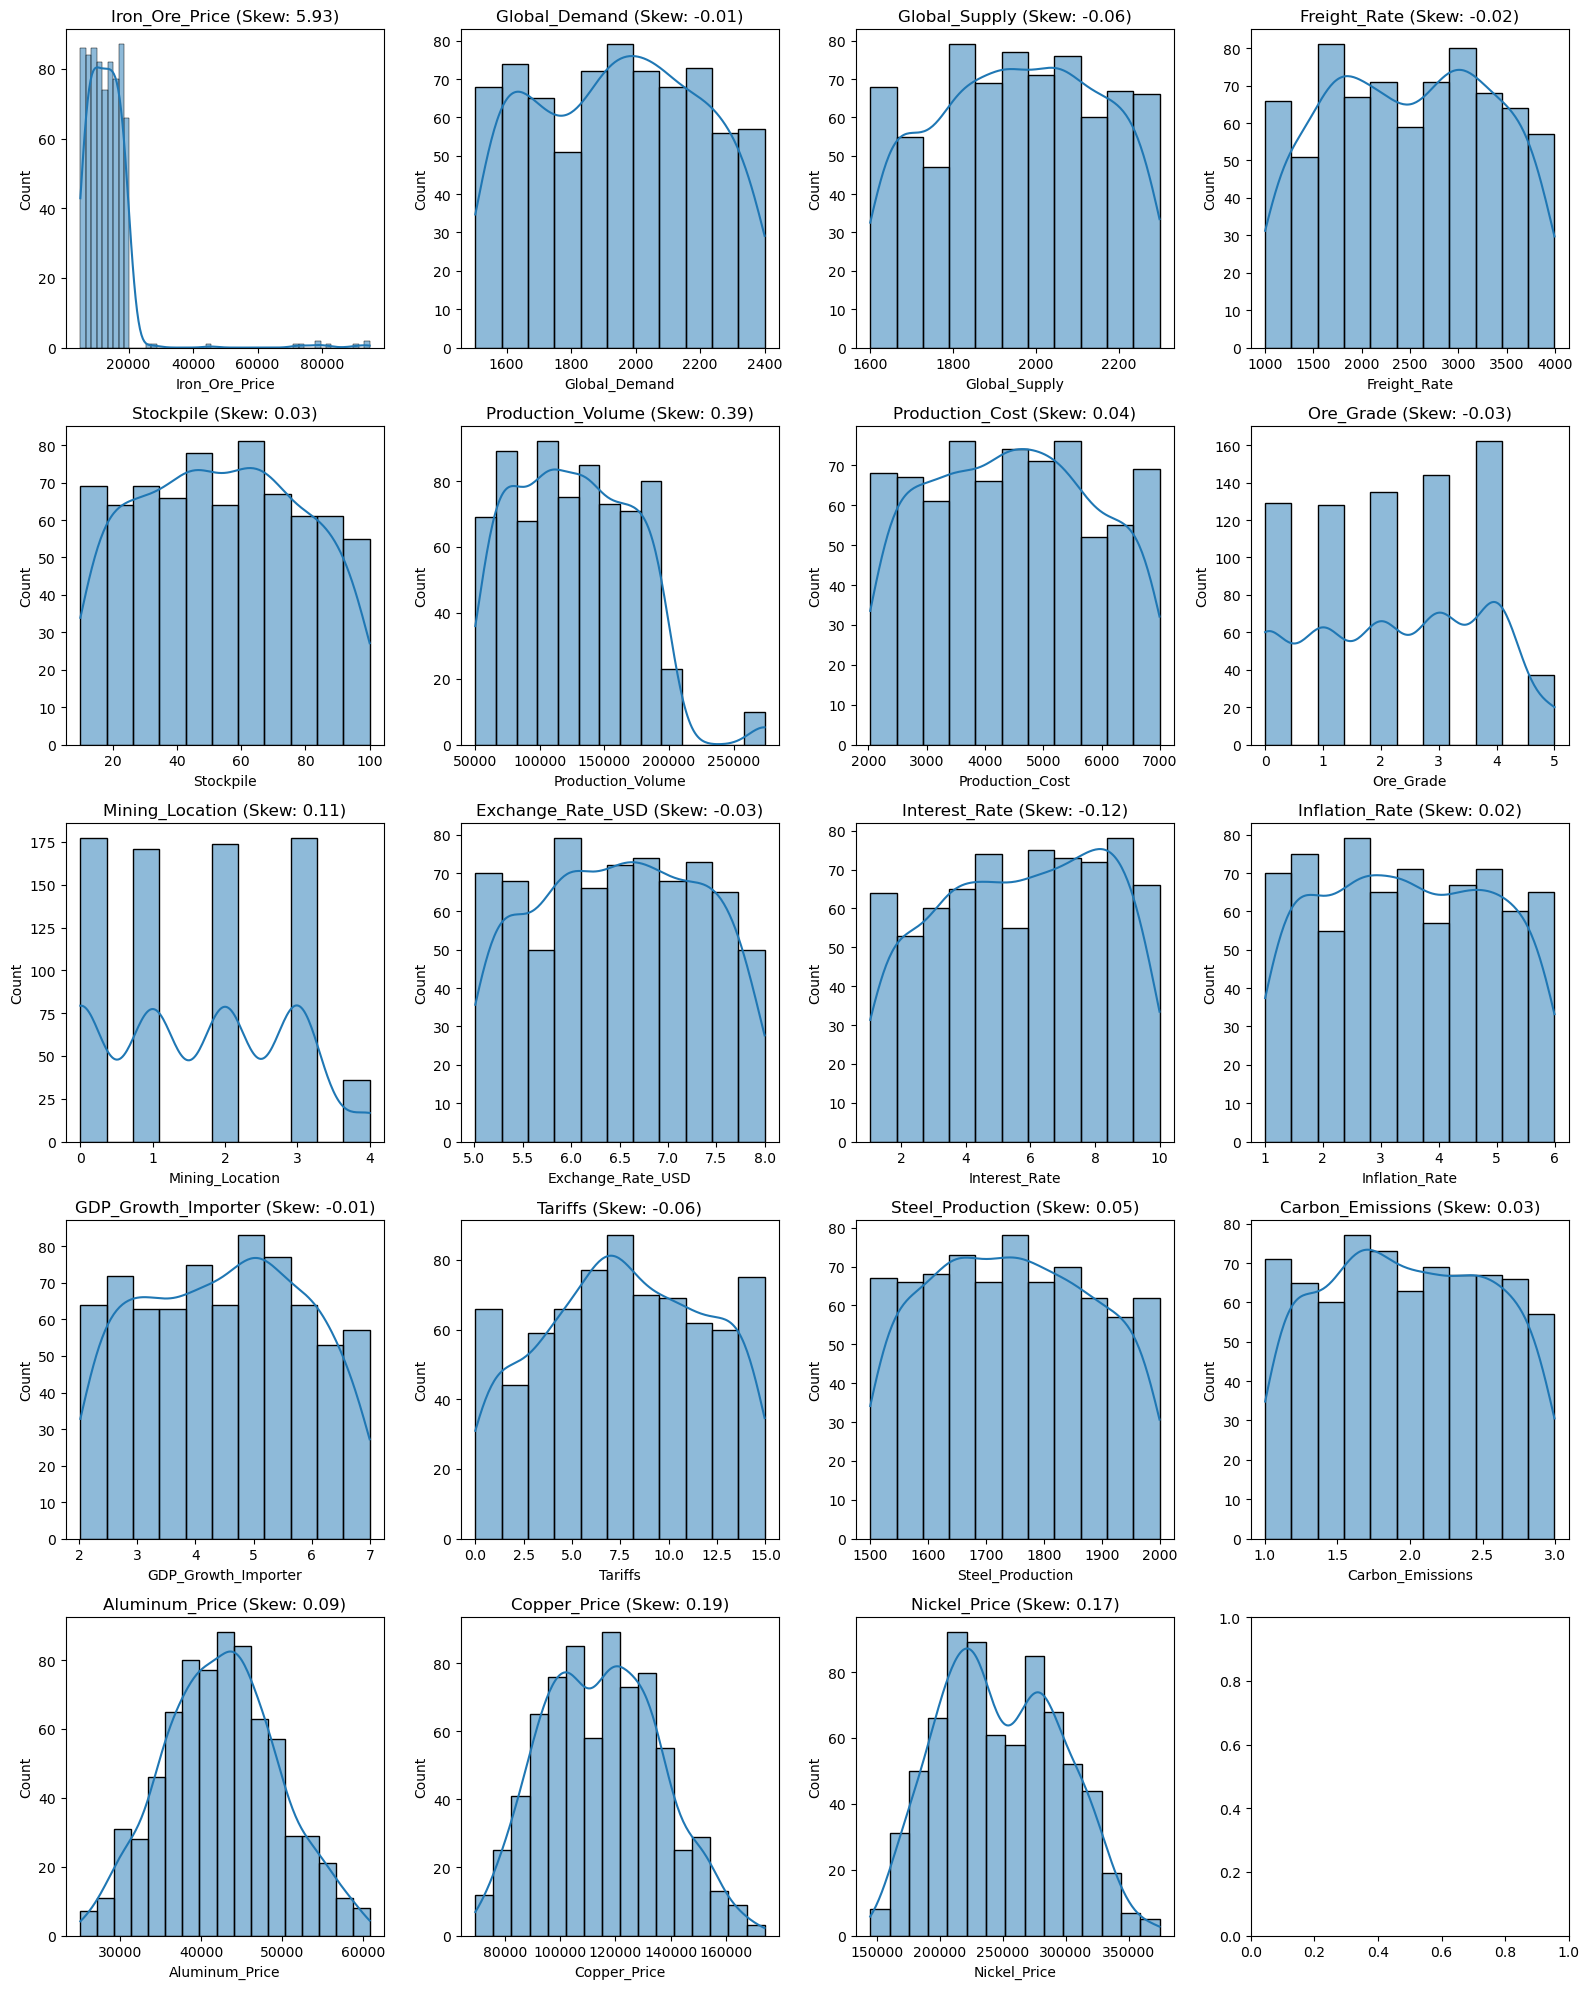

In [32]:
import warnings
warnings.filterwarnings('ignore')
# Set up the number of subplots
cols = imp_df1.columns
num_cols = len(cols)
rows = (num_cols // 4) + 1  # Adjust the layout to have 4 plots per row

# Create subplots
fig, axs = plt.subplots(rows, 4, figsize=(16, rows*4))

# Flatten axs for easy iteration if multiple rows
axs = axs.flatten()

# Loop through each column to plot histogram and calculate skewness
for i, col in enumerate(cols):
    sns.histplot(imp_df1[col], kde=True, ax=axs[i])
    skewness = imp_df1[col].skew()
    axs[i].set_title(f'{col} (Skew: {skewness:.2f})')

# Adjust layout
plt.tight_layout()
plt.show()

## Transformation

In [33]:
import numpy as np

imp_df1['Production_Volume'] = np.log1p(imp_df1['Production_Volume'])

Text(0.5, 1.0, 'Log Transformation')

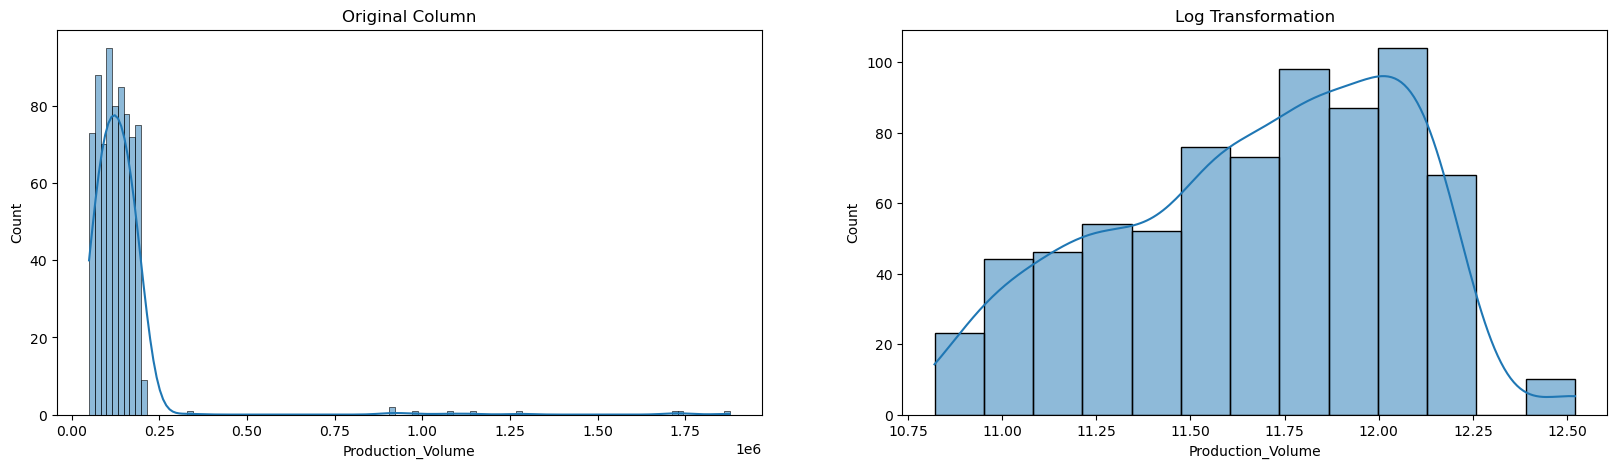

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Original column
sns.histplot(imp_df['Production_Volume'], kde=True, ax=axs[0])
axs[0].set_title('Original Column')

# Log transformation
sns.histplot(imp_df1['Production_Volume'], kde=True, ax=axs[1])
axs[1].set_title('Log Transformation')

In [35]:
import numpy as np

imp_df1['Iron_Ore_Price'] = np.log1p(imp_df1['Iron_Ore_Price'])

Text(0.5, 1.0, 'Log Transformation')

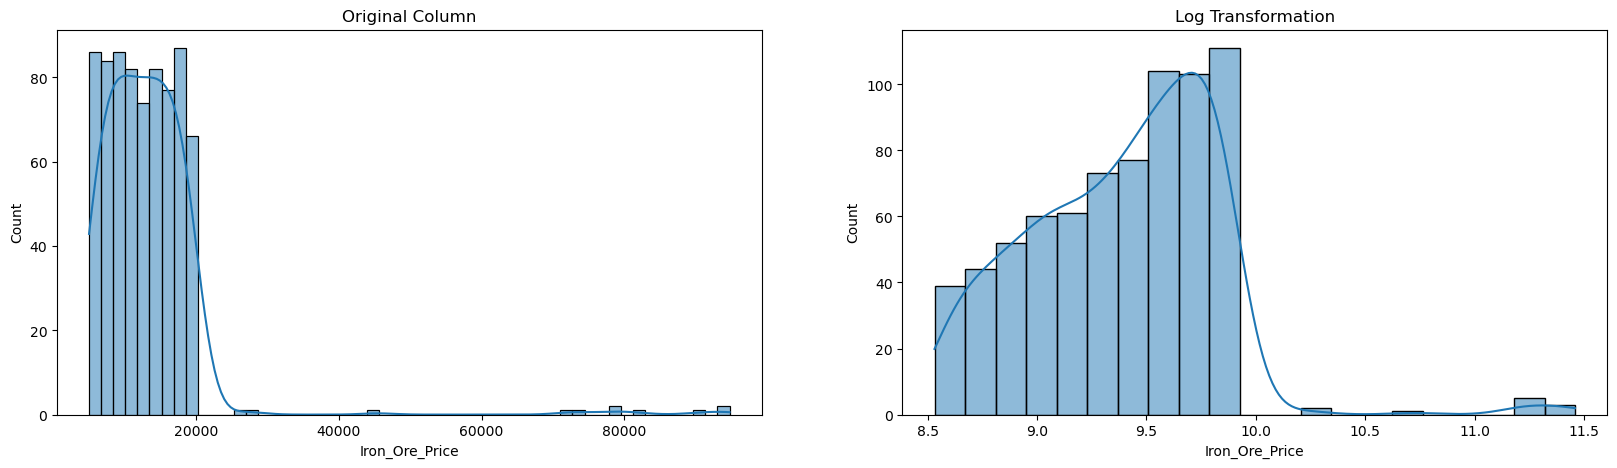

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Original column
sns.histplot(imp_df['Iron_Ore_Price'], kde=True, ax=axs[0])
axs[0].set_title('Original Column')

# Log transformation
sns.histplot(imp_df1['Iron_Ore_Price'], kde=True, ax=axs[1])
axs[1].set_title('Log Transformation')

In [37]:
imp_df.skew()

Iron_Ore_Price         5.928861
Global_Demand         -0.008264
Global_Supply         -0.057840
Freight_Rate          -0.018312
Stockpile              0.034666
Production_Volume      8.753061
Production_Cost        0.043721
Ore_Grade             -0.033534
Mining_Location        0.113749
Exchange_Rate_USD     -0.025405
Interest_Rate         -0.119616
Inflation_Rate         0.023332
GDP_Growth_Importer   -0.014046
Tariffs               -0.062581
Steel_Production       0.052137
Carbon_Emissions       0.026186
Aluminum_Price         0.090020
Copper_Price           0.193244
Nickel_Price           0.170553
dtype: float64

In [38]:
imp_df1.skew()

Iron_Ore_Price         0.590607
Global_Demand         -0.008264
Global_Supply         -0.057840
Freight_Rate          -0.018312
Stockpile              0.034666
Production_Volume     -0.337935
Production_Cost        0.043721
Ore_Grade             -0.033534
Mining_Location        0.113749
Exchange_Rate_USD     -0.025405
Interest_Rate         -0.119616
Inflation_Rate         0.023332
GDP_Growth_Importer   -0.014046
Tariffs               -0.062581
Steel_Production       0.052137
Carbon_Emissions       0.026186
Aluminum_Price         0.090020
Copper_Price           0.193244
Nickel_Price           0.170553
dtype: float64

In [39]:
imp_df1.mean()

Iron_Ore_Price              9.386914
Global_Demand            1944.284051
Global_Supply            1955.733267
Freight_Rate             2500.464071
Stockpile                  53.721560
Production_Volume          11.675774
Production_Cost          4471.081457
Ore_Grade                   2.262585
Mining_Location             1.624490
Exchange_Rate_USD           6.483978
Interest_Rate               5.700138
Inflation_Rate              3.461189
GDP_Growth_Importer         4.473035
Tariffs                     7.692735
Steel_Production         1744.583121
Carbon_Emissions            1.983236
Aluminum_Price          42511.253393
Copper_Price           115184.772517
Nickel_Price           248309.146126
dtype: float64

## Scaling

In [40]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
imp_df2 = scaler.fit_transform(imp_df1)

In [41]:
imp_df3 = pd.DataFrame(imp_df2,columns = ['Iron_Ore_Price', 'Global_Demand', 'Global_Supply','Freight_Rate' , 'Stockpile', 'Production_Volume', 'Production_Cost', 'Ore_Grade',
           'Mining_Location', 'Exchange_Rate_USD', 'Interest_Rate', 'Inflation_Rate', 'GDP_Growth_Importer', 'Tariffs', 'Steel_Production'
          ,'Carbon_Emissions', 'Aluminum_Price', 'Copper_Price', 'Nickel_Price'])
imp_df3

,Iron_Ore_Price,Global_Demand,Global_Supply,Freight_Rate,Stockpile,Production_Volume,Production_Cost,Ore_Grade,Mining_Location,Exchange_Rate_USD,Interest_Rate,Inflation_Rate,GDP_Growth_Importer,Tariffs,Steel_Production,Carbon_Emissions,Aluminum_Price,Copper_Price,Nickel_Price
0,0.001499,1.443988,-1.424940,-0.004482,-1.448069,-0.171152,1.006714,-1.479778,1.94502,-0.830237,-1.525374,1.317174,-0.205246,1.423356,-0.705249,-1.351802,0.967121,-0.094709,-0.764760
1,0.703023,-0.255159,0.525758,-1.737387,-0.004516,-0.406708,1.258762,1.136305,1.12624,0.604966,-0.311828,-0.263840,0.798783,0.025657,0.440278,-0.846117,0.812531,0.718305,0.596394
2,-1.754092,-0.769156,1.110724,-1.748296,-0.658814,-1.393383,-1.112937,-1.479778,-1.33010,0.915721,-0.586734,-0.307560,-0.973855,0.987247,-0.479545,-0.774323,-0.310724,-1.629851,-1.278196
3,-0.701104,0.350135,-0.452092,-0.509504,0.278842,-0.205926,-0.227539,-0.171736,-1.33010,-1.695129,-0.021513,-1.567788,-1.427099,-1.022826,-0.551064,0.807448,-0.266147,-0.961894,-1.087229
4,0.629485,1.485356,0.946222,1.516633,1.142515,-1.197534,-1.171070,-0.825757,-1.33010,0.079413,-0.766356,0.202504,1.520855,-0.081204,-1.598542,-1.561906,0.848012,1.562586,1.355778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,1.004863,0.617054,1.450308,-1.184834,-0.786262,0.752172,0.413779,-0.825757,0.30746,-0.480350,-0.333940,-0.565820,0.064752,0.417249,-1.561934,-1.117205,0.203330,1.963232,1.636285
731,-0.358210,-0.293090,-0.625728,-0.340418,-0.268007,-0.331086,-1.121007,-0.171736,-0.51132,-1.723081,-0.798136,-1.129742,0.495526,-0.228501,0.300361,1.161394,0.984389,-1.017707,-0.589566
732,-0.742136,-0.155764,1.709495,-0.160131,-1.653023,0.045548,0.648312,1.136305,-0.51132,0.289621,1.190907,-0.518132,-0.866079,1.502171,-0.837331,0.671751,-0.545378,-0.505852,-0.401164
733,-0.219797,-1.231930,-0.175739,-0.258279,-0.953321,-1.496468,-1.185506,1.790326,0.30746,1.449463,-1.677259,0.104289,0.742817,0.384176,-0.815259,0.851007,-0.059015,0.005577,-0.915621


In [42]:
imp_df3.describe()

,Iron_Ore_Price,Global_Demand,Global_Supply,Freight_Rate,Stockpile,Production_Volume,Production_Cost,Ore_Grade,Mining_Location,Exchange_Rate_USD,Interest_Rate,Inflation_Rate,GDP_Growth_Importer,Tariffs,Steel_Production,Carbon_Emissions,Aluminum_Price,Copper_Price,Nickel_Price
count,7.350000e+02,7.350000e+02,7.350000e+02,7.350000e+02,7.350000e+02,7.350000e+02,7.350000e+02,7.350000e+02,7.350000e+02,7.350000e+02,7.350000e+02,7.350000e+02,7.350000e+02,7.350000e+02,7.350000e+02,7.350000e+02,7.350000e+02,7.350000e+02,7.350000e+02
mean,-3.103187e-15,-3.963572e-16,-1.094816e-15,-7.975480e-17,-1.570928e-17,4.164167e-15,1.957618e-16,8.096320e-17,7.008755e-17,8.881784e-16,2.900174e-17,-3.383537e-17,1.063397e-16,1.794483e-16,6.477056e-16,1.643432e-16,6.597897e-16,7.250436e-17,6.090366e-16
std,1.000681e+00,1.000681e+00,1.000681e+00,1.000681e+00,1.000681e+00,1.000681e+00,1.000681e+00,1.000681e+00,1.000681e+00,1.000681e+00,1.000681e+00,1.000681e+00,1.000681e+00,1.000681e+00,1.000681e+00,1.000681e+00,1.000681e+00,1.000681e+00,1.000681e+00
min,-1.961766e+00,-1.739764e+00,-1.797663e+00,-1.780430e+00,-1.745208e+00,-2.233606e+00,-1.738642e+00,-1.479778e+00,-1.330100e+00,-1.747486e+00,-1.821752e+00,-1.687604e+00,-1.768111e+00,-1.839842e+00,-1.729322e+00,-1.729224e+00,-2.463165e+00,-2.195636e+00,-2.185933e+00
25%,-7.390453e-01,-8.817764e-01,-7.896168e-01,-8.498655e-01,-8.408888e-01,-7.767353e-01,-8.328097e-01,-8.257568e-01,-5.113198e-01,-8.040412e-01,-8.148944e-01,-8.359993e-01,-8.649522e-01,-7.774854e-01,-8.247883e-01,-8.087650e-01,-7.298884e-01,-7.723302e-01,-7.902367e-01
50%,1.230886e-01,4.431763e-02,1.039826e-02,2.065854e-02,-6.375394e-03,1.537498e-01,-3.057381e-02,-1.717361e-01,3.074603e-01,3.510726e-02,3.962523e-02,-1.517842e-02,4.516063e-02,-2.444955e-02,-1.456351e-02,-1.026521e-02,1.114746e-02,1.704733e-02,-1.239815e-01
75%,7.315948e-01,8.348871e-01,8.322238e-01,8.272909e-01,7.977508e-01,8.351837e-01,7.923368e-01,1.136305e+00,1.126240e+00,8.490139e-01,8.802137e-01,8.668929e-01,7.973572e-01,8.248712e-01,8.264349e-01,8.552798e-01,6.829327e-01,7.143341e-01,7.682563e-01
max,4.749195e+00,1.794160e+00,1.732469e+00,1.775428e+00,1.845797e+00,2.206834e+00,1.797581e+00,1.790326e+00,1.945020e+00,1.794909e+00,1.683250e+00,1.744630e+00,1.818722e+00,1.737594e+00,1.808414e+00,1.784968e+00,2.588584e+00,2.815340e+00,2.661524e+00


## MODEL TRAINING

In [43]:
X = imp_df3.iloc[:,1:]
y = imp_df3.iloc[:,0]

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
linear_reg = LinearRegression()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Train the Linear Regression model
linear_reg.fit(X_train, y_train)

# Predict prices on the test data
y_pred = linear_reg.predict(X_test)

In [47]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.33816220404431035
R-squared: 0.6505816567780642


## MODEL OPTIMIZATION FOR HIGHER METRICS

In [48]:
from sklearn.linear_model import Ridge

In [49]:
ridge = Ridge()

# Hyperparameter tuning using GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model
best_ridge = grid_search.best_estimator_

# Predictions and Evaluation
y_pred = best_ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Best Alpha: {grid_search.best_params_}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Best Alpha: {'alpha': 10}
Mean Squared Error: 0.33527176672183967
R-squared: 0.6535683058131297


In [50]:
import xgboost as xgb

# XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid_xgb = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0]
}

grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='r2')
grid_search_xgb.fit(X_train, y_train)

# Best model
best_xgb = grid_search_xgb.best_estimator_

In [51]:
# Predictions and Evaluation
y_pred_xgb = best_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'Best Parameters for XGBoost: {grid_search_xgb.best_params_}')
print(f'Mean Squared Error (XGB): {mse_xgb}')
print(f'R-squared (XGB): {r2_xgb}')

Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.7}
Mean Squared Error (XGB): 0.09994926380737738
R-squared (XGB): 0.8967238037008719
